In [34]:
import json
import time
import pandas as pd
from collections import Counter
import torch

import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time
import numpy as np

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [35]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn



[]


In [36]:
# Basic data files and paths
TOP_100_PATH = '../data/popular_100_memes.csv'
TOP_100 = pd.read_csv(TOP_100_PATH, encoding = "ISO-8859-1")
DATA_PATH = '../data/memes/'

STATS_PATH = '../data/statistics.json'
with open(STATS_PATH, 'r') as f:
    STATS = json.load(f)
print(TOP_100.head())

          ID                   Name  \
0  112126428   Distracted Boyfriend   
1     438680  Batman Slapping Robin   
2   87743020            Two Buttons   
3  181913649    Drake Hotline Bling   
4      61579    One Does Not Simply   

                                     Alternate Names  
0  distracted bf, guy checking out another girl, ...  
1                                                NaN  
2  2 red buttons, choice button, which button, da...  
3  drakeposting, drakepost, drake hotline approve...  
4  one does not simply walk into morder, lord of ...  


In [37]:
memes_count = Counter(STATS['memes'])
print(len(STATS['memes']))
for f, c in memes_count.most_common():
    print(f, c)

99
Bad-Luck-Brian.json 32141
One-Does-Not-Simply.json 26186
Philosoraptor.json 19971
Boardroom-Meeting-Suggestion.json 18164
Futurama-Fry.json 17325
First-World-Problems.json 17272
The-Most-Interesting-Man-In-The-World.json 15850
Batman-Slapping-Robin.json 14802
Bad-Pun-Dog.json 13194
X-X-Everywhere.json 12985
Expanding-Brain.json 12826
Two-Buttons.json 12232
But-Thats-None-Of-My-Business.json 11097
Ancient-Aliens.json 10555
Creepy-Condescending-Wonka.json 10374
Grumpy-Cat.json 9569
Y-U-No.json 9370
The-Rock-Driving.json 9286
That-Would-Be-Great.json 8600
Waiting-Skeleton.json 8592
Change-My-Mind.json 8563
Leonardo-Dicaprio-Cheers.json 8377
10-Guy.json 8258
Captain-Picard-Facepalm.json 8105
Matrix-Morpheus.json 7833
Third-World-Skeptical-Kid.json 7782
Confession-Bear.json 7778
Am-I-The-Only-One-Around-Here.json 7291
Success-Kid.json 7074
Hide-the-Pain-Harold.json 6973
Roll-Safe-Think-About-It.json 6948
Evil-Toddler.json 6106
Awkward-Moment-Sealion.json 6101
Face-You-Make-Robert-Downey-

In [38]:

selected_memes = [
    'Woman-Yelling-At-Cat.json',
    'Left-Exit-12-Off-Ramp.json',
    'Surprised-Pikachu.json',
    'Is-This-A-Pigeon.json',
    'Drake-Hotline-Bling.json'
]

def open_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

memes_data = [open_data(DATA_PATH + meme) for meme in selected_memes]

In [39]:
# Preprocessing data for modelling
from nltk import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

In [40]:
def parse_text(text):
    text = text.lower().strip()
    return word_tokenize(text)

def parse_blocks(blocks):
    result = []
    for i,b in enumerate(blocks):
        result.append(parse_text(b))
#         if i < len(blocks) - 1:
#             result.extend('|')
    return result

ex = parse_blocks(memes_data[0][0]['boxes'])
print(ex)
model = Word2Vec(ex, min_count=1)
print(model)

[['me', ':', 'i', 'do', "n't", 'know', 'what', 'to', 'do', 'with', 'my', 'life'], ['me', 'to', 'me', ':', 'and', 'i', 'do', "n't", 'want', 'to', 'see', 'it']]
Word2Vec(vocab=15, size=100, alpha=0.025)


# Most Frequent Words

In [41]:
#each format is a element in array 
#then concetenate all box strings of a meme format, amke it into a single stringle 

allwords_memeformat = []
#onestring_memeformat = ''

for i in range(len(memes_data)):
    eachformat_string = ''
    
    for ele in memes_data[i]:
        print("This is ele: " + str(ele))
        box = ele['boxes']
        
        string = ' '.join(box)
        eachformat_string = eachformat_string +  string
    
    allwords_memeformat.append(eachformat_string)

This is ele: {'url': 'https://i.imgflip.com/3z10rd.jpg', 'post': 'https://imgflip.com/i/3z10rd', 'metadata': {'views': '366', 'img-votes': '1', 'title': 'What are you doing me?', 'author': 'mjelliott80'}, 'boxes': ["me: i don't know what to do with my life", "me to me: and i don't want to see it"]}
This is ele: {'url': 'https://i.imgflip.com/3zasdf.jpg', 'post': 'https://imgflip.com/i/3zasdf', 'metadata': {'views': '123', 'img-votes': 0, 'title': 'Woman Yelling At Cat', 'author': 'NashVillainyNashVillainy'}, 'boxes': ['you said you were a black person', 'i lied']}
This is ele: {'url': 'https://i.imgflip.com/3y8lzm.jpg', 'post': 'https://imgflip.com/i/3y8lzm', 'metadata': {'views': '1,659', 'img-votes': '8', 'title': 'ur mum', 'author': 'Questionable_Memes'}, 'boxes': ['You', 'When your mom yells at you for buying robux with her credit card']}
This is ele: {'url': 'https://i.imgflip.com/3yzqug.jpg', 'post': 'https://imgflip.com/i/3yzqug', 'metadata': {'views': '242', 'img-votes': '1', '

This is ele: {'url': 'https://i.imgflip.com/3ijtc1.jpg', 'post': 'https://imgflip.com/i/3ijtc1', 'metadata': {'views': '223', 'img-votes': '1', 'title': 'Woman Yelling At Cat', 'author': 'ReverendJack'}, 'boxes': ['STAY WOKE!! I see your fragility']}
This is ele: {'url': 'https://i.imgflip.com/3ipyib.jpg', 'post': 'https://imgflip.com/i/3ipyib', 'metadata': {'views': '163', 'img-votes': '1', 'title': 'Woman Yelling At Cat', 'author': 'nukeman'}, 'boxes': ['why is a cat\nat my weeding', 'meow']}
This is ele: {'url': 'https://i.imgflip.com/3irnld.jpg', 'post': 'https://imgflip.com/i/3irnld', 'metadata': {'views': '228', 'img-votes': '1', 'title': 'Woman Yelling At Cat', 'author': 'richardcontant'}, 'boxes': ['You have firearms, you’r a CRIMINAL ! Polysesouvient Fan ?']}
This is ele: {'url': 'https://i.imgflip.com/3is2we.jpg', 'post': 'https://imgflip.com/i/3is2we', 'metadata': {'views': '176', 'img-votes': '1', 'title': 'Woman Yelling At Cat', 'author': 'Crly77'}, 'boxes': ['I said stop 

This is ele: {'url': 'https://i.imgflip.com/3qgkh2.jpg', 'post': 'https://imgflip.com/i/3qgkh2', 'metadata': {'views': '193', 'img-votes': '2', 'title': 'epic driving away', 'author': 'DanielNewton3'}, 'boxes': ['Dream Way', 'Nightmare Road', 'dude who is escaping from the cops']}
This is ele: {'url': 'https://i.imgflip.com/3s88e6.jpg', 'post': 'https://imgflip.com/i/3s88e6', 'metadata': {'views': '165', 'img-votes': '1', 'title': 'Left Exit 12 Off Ramp', 'author': 'JamieO36'}, 'boxes': ['Getting kills', '125000 cases', 'Coronavirus']}
This is ele: {'url': 'https://i.imgflip.com/3sm32n.jpg', 'post': 'https://imgflip.com/i/3sm32n', 'metadata': {'views': '1,271', 'img-votes': '2', 'title': 'Left Exit 12 Off Ramp', 'author': 'ChubbyMcPhattz'}, 'boxes': ['SELF QUARANTINE', 'WUHAN BUFFET', 'me']}
This is ele: {'url': 'https://i.imgflip.com/3qhrkm.jpg', 'post': 'https://imgflip.com/i/3qhrkm', 'metadata': {'views': '176', 'img-votes': '2', 'title': 'Left Exit 12 Off Ramp', 'author': 'wierdo'}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




This is ele: {'url': 'https://i.imgflip.com/3jrut6.jpg', 'post': 'https://imgflip.com/i/3jrut6', 'metadata': {'views': '98', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'ThePRoGaMErGD'}, 'boxes': ['Using font shadow', 'Not using font shadow']}
This is ele: {'url': 'https://i.imgflip.com/3jrns9.jpg', 'post': 'https://imgflip.com/i/3jrns9', 'metadata': {'views': '178', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'gabrielrosado'}, 'boxes': ['Singing Dont Mine At Night', "Singing Don't mine at night"]}
This is ele: {'url': 'https://i.imgflip.com/38nu0s.jpg', 'post': 'https://imgflip.com/i/38nu0s', 'metadata': {'views': '1,685', 'img-votes': '3', 'title': 'Drake Hotline Bling', 'author': 'GeorgeWood2'}, 'boxes': ['AP Biology', 'AP Chemistry']}
This is ele: {'url': 'https://i.imgflip.com/32hevc.jpg', 'post': 'https://imgflip.com/i/32hevc', 'metadata': {'views': '1,200', 'img-votes': '6', 'title': 'Drake Hotline Bling', 'author': 'DankDoodleMemesFan'}, 'boxes'

This is ele: {'url': 'https://i.imgflip.com/3bncpq.jpg', 'post': 'https://imgflip.com/i/3bncpq', 'metadata': {'views': '237', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'NateAndMattMemes'}, 'boxes': ['2jz swap my engine', 'LS SWAP IT']}
This is ele: {'url': 'https://i.imgflip.com/3a1r5b.jpg', 'post': 'https://imgflip.com/i/3a1r5b', 'metadata': {'views': '178', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'GreekGamer117'}, 'boxes': ['doing work in school', 'playing minecraft in school']}
This is ele: {'url': 'https://i.imgflip.com/3cdpjs.jpg', 'post': 'https://imgflip.com/i/3cdpjs', 'metadata': {'views': '205', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'KingZach24'}, 'boxes': ['Trick-or-treating', 'Making Spooktober memes']}
This is ele: {'url': 'https://i.imgflip.com/3c4305.jpg', 'post': 'https://imgflip.com/i/3c4305', 'metadata': {'views': '171', 'img-votes': '1', 'title': 'Drake Hotline Bling', 'author': 'SairVargasRamos'}, 'boxes': [

In [42]:
allwords_memeformat[1]

'washing their hands posting memes on imgflip everyone who sees thisplaying games Drawing random arts Me during quarantineThe highway Do not cross this place Someone who ignores rulessafety hunting ghosts and otherthings sam,dean,cas,jackMcdonalds CHICK-FIL-A My family going "thu xtra mile fur chikn"Do all the work assigned Spend your entire day on YT and discord and have 9 different missing assignments MEHOW TO USE THE CHANGE MY MIND MEME TEMPLATE using an accually interesting, fact or idea no body will upvote this dumb peopleany of my accomplishments "well your sister did.." my momCovid 19 cure A real lightsaber MeDo my work Scroll through imgflip for no reason MeBeing nice to people Being douchebags Popular kidssafe approach Second wave americaBe productive during quarantine sit in one place all day and procrastinate meHelping Kids with work Giving them tons of worthless homework when they are stressed Teachers during the virusactually quarantining wuhan trying to cover it up Chinad

In [43]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
["str"]

['str']

In [47]:
for i in range(len(allwords_memeformat)):
    print('\n')
    print("Meme format: " + str(i))
    common_words = get_top_n_words([allwords_memeformat[i]], 40) #input should be an array not a string
    for word, freq in common_words:
        print(word, freq)



Meme format: 0
you 1818
me 1416
my 940
your 544
said 391
not 332
no 264
have 245
with 234
re 231
just 227
don 224
can 219
who 218
do 203
cat 203
mom 199
like 186
when 183
yelling 177
get 172
we 170
this 169
what 151
her 146
out 137
so 136
about 135
up 131
why 129
they 127
trying 124
but 124
he 118
people 115
want 112
an 112
saying 111
from 111
how 111


Meme format: 1
my 416
memes 398
me 347
you 242
with 233
life 220
your 217
good 192
people 158
meme 155
school 153
get 125
home 123
work 115
fortnite 112
this 102
making 102
when 99
being 98
who 97
homework 97
every 97
no 94
year 94
go 94
games 89
up 87
imgflip 86
going 86
not 84
like 84
make 83
out 83
new 82
minecraft 81
normal 78
an 77
do 76
about 76
free 76


Meme format: 2
me 1821
you 1483
when 702
your 495
my 479
mom 305
out 242
teacher 233
meme 229
no 210
have 209
get 205
can 190
pikachu 185
friend 183
but 183
not 181
do 177
with 174
gets 168
this 168
kid 159
what 156
see 151
we 136
up 133
don 131
they 131
people 129
everyone 127

In [159]:
#'Woman-Yelling-At-Cat.json',


common_words = get_top_n_words(allwords_memeformat, 20)
for word, freq in common_words:
    print(word, freq)

you 1818
me 1416
my 940
it 635
your 544
said 391
not 332
on 329
no 264
have 245
with 234
re 231
just 227
don 224
can 219
who 218
do 203
cat 203
mom 199
like 186


# CountVecotrizer

In [132]:
cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
count_vector=cv.fit_transform(allwords_memeformat)

In [133]:
cv.vocabulary_

{'me': 5155,
 'don': 2536,
 'know': 4589,
 'what': 9199,
 'do': 2501,
 'with': 9296,
 'my': 5613,
 'life': 4803,
 'want': 9074,
 'see': 7321,
 'ityou': 4346,
 'said': 7128,
 'you': 9494,
 'were': 9183,
 'black': 952,
 'person': 6239,
 'liedyou': 4800,
 'when': 9210,
 'your': 9516,
 'mom': 5476,
 'yells': 9465,
 'at': 603,
 'for': 3280,
 'buying': 1310,
 'robux': 7025,
 'her': 3885,
 'credit': 2072,
 'cardstudy': 1394,
 'test': 8303,
 'study': 8024,
 'everythingpeople': 2917,
 'yelling': 9459,
 'china': 1660,
 'spreading': 7851,
 'corona': 1956,
 'testing': 8307,
 'new': 5701,
 'virusme': 9001,
 'thinking': 8393,
 'demon': 2306,
 'room': 7053,
 'pile': 6313,
 'of': 5879,
 'clothes': 1786,
 'on': 5929,
 'dresser': 2615,
 'earth': 2700,
 'flat': 3207,
 'shut': 7508,
 'up': 8820,
 'uncivilised': 8769,
 'beingmy': 848,
 'friend': 3357,
 'shipping': 7442,
 'some': 7728,
 'other': 5987,
 'dude': 2653,
 'wondering': 9321,
 'why': 9238,
 'she': 7411,
 'yellinghow': 9460,
 'dare': 2202,
 'cheat'

In [137]:
cv.vocabulary_[0]

KeyError: 0

In [134]:
count_vector.shape
wordcount = count_vector.toarray()
wordcount 

array([[5, 8, 1, ..., 1, 1, 1]], dtype=int64)

In [135]:
wordcount2 = np.array(wordcount[0])
wordcount2.shape

(9581,)

In [136]:
frequent_index = np.argpartition(wordcount2, -10)[-10:]
frequent_index

array([ 603, 7128, 5879, 9494, 9516, 8333, 3280, 5155, 4314, 5613])

# get top n words

In [147]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [148]:
#'Woman-Yelling-At-Cat.json',
common_words = get_top_n_words(allwords_memeformat, 20)
for word, freq in common_words:
    print(word, freq)

you 1818
me 1416
my 940
it 635
your 544
said 391
not 332
on 329
no 264
have 245
with 234
re 231
just 227
don 224
can 219
who 218
do 203
cat 203
mom 199
like 186


In [8]:
# making X and y for RNN
word = []
y = []
for i in range(len(memes_data)):
    #print("This is i: " + str(i))
    for ele in memes_data[i]:
        y.append(i) 

        box = ele['boxes']
        parsedtext = parse_blocks(box)
        
        #appen all words in a box as to array2
        array2 = []
        for box_element in parsedtext:
            for box_word in box_element:
                array2.append(box_word)
        print(array2)        
        
        #each element in wordcontains all words of a box    
        word.append(array2)

X_words = word
print(word)
print(y) 

['me', ':', 'i', 'do', "n't", 'know', 'what', 'to', 'do', 'with', 'my', 'life', 'me', 'to', 'me', ':', 'and', 'i', 'do', "n't", 'want', 'to', 'see', 'it']
['you', 'said', 'you', 'were', 'a', 'black', 'person', 'i', 'lied']
['you', 'when', 'your', 'mom', 'yells', 'at', 'you', 'for', 'buying', 'robux', 'with', 'her', 'credit', 'card']
['study', 'for', 'test', 'study', 'for', 'everything']
['people', 'yelling', 'at', 'china', 'for', 'spreading', 'corona', 'china', 'testing', 'new', 'virus']
['me', 'thinking', 'a', 'demon', "'s", 'in', 'my', 'room', '.', 'pile', 'of', 'clothes', 'on', 'my', 'dresser', '.']
['the', 'earth', 'is', 'flat', 'shut', 'up', 'you', 'uncivilised', 'being']
['my', 'friend', 'shipping', 'me', 'and', 'some', 'other', 'dude', 'me', 'wondering', 'why', 'she', "'s", 'yelling']
['how', 'dare', 'you', 'cheat', 'on', 'me', '!', '!', 'dude', 'im', 'your', 'cat']
['we', 'are', 'not', 'naming', 'her', 'ripley', 'xenomorph', 'ripley']
['you', 'had', 'no', 'glove', 'on', 'your',

['liquor', 'in', 'the', 'front', '.', 'poker', 'in', 'the', 'rear', '.', 'lick', 'her', 'in', 'the', 'front', '.', 'poke', 'her', 'in', 'the', 'rear', '.']
['it', "'s", 'covid-19', 'china', 'virus']
['you', 'said', 'i', 'was', 'essential', 'no', ',', 'i', 'said', 'you', 'were', 'mental']
['my', 'brain', 'after', 'i', 'make', 'a', 'bad', 'decision', 'meme', 'generators']
['you', 'said', 'you', 'would', 'love', 'me', 'forever', '!', 'that', 'was', 'in', 'cat', 'years', '.']
['your', 'weed', 'sucks', 'it', '’', 's', 'catnip']
['you', 'do', "n't", 'really', 'speak', 'spanish', '!', 'tu', 'mientes', '!', '!']
['i', 'want', 'to', 'be', 'loved', 'for', 'who', 'i', 'am', '!', '!', '!', '!', '!', '!', '!', 'hmmm..', 'i', 'got', 'nothin', "'"]
['grace', 'telling', 'me', 'to', 'stop', 'me']
['facebook', 'is', 'censoring', 'posts', 'it', "'s", 'a', 'software', 'bug']
['people', 'who', 'hate', 'trump', 'trump']
['me', 'who', 'just', 'woke', 'up', 'everyone', 'arguing', 'about', 'some', 'serious', '

['there', 'is', 'no', "'", 'i', "'", 'in', 'team', '!', 'there', 'is', 'a', "'me", "'", 'in', 'team', '.']
['i', 'got', 'bad', 'luck', 'because', 'of', 'you', 'white', 'cats', 'do', "n't", 'give', 'bad', 'luck']
['mini', 'mouth', 'stabbers', 'cap', "'", 'n', 'crunch', 'is', 'a', 'delicious', 'part', 'of', 'a', 'balanced', 'breakfast']
['i', 'before', 'e', 'except', 'after', 'c', '!', '...', 'weird']
['you', 'didnt', 'come', 'to', 'the', 'wedding', '!', '!', '!', 'cause', 'i', 'was', 'suppose', 'to', 'be', 'groom', '.']
['teachers', 'yelling', 'at', 'students', 'to', 'get', 'to', 'the', 'back', 'of', 'the', 'lunch', 'line', 'me', 'just', 'getting', 'a', 'fork']
['conversation', 'starter', '!', '!', '!', 'it', "'s", 'called', 'starting', 'bullshit', 'and', 'drama', '!', '!', '!']
['i', 'would', 'have', '!', 'ild', "'ve"]
['i', "'m", 'keto', 'for', 'life', '!', 'you', 'ca', "n't", 'tempt', 'me', '!', 'three', 'words', ':', 'girl', 'scout', 'cookies']
['hard', 'luck', 'karen', '...', 'i', 

['i', "'m", 'not', 'getting', 'any', 'comment', 'notifications', 'nobody', 'likes', 'your', 'memes']
['it', "'s", 'a', 'bug', '!', 'undocumented', 'feature', '.']
['you', 'told', 'me', 'it', 'was', 'the', 'love', 'of', 'your', 'life', 'i', 'have', 'seven']
['you', 'said', 'my', 'land', 'rover', 'd2', 'was', 'dependable', '!', 'no', 'i', 'said', 'it', 'was', 'mendable', 'you', 'stupid', 'cow']
['you', 'put', 'a', 'chevy', 'engine', 'in', 'your', 'ford', 'i', 'know', 'lol']
['you', 'ate', 'all', 'the', 'cannabis', '!', 'i', 'thought', 'it', 'was', 'catnip', '.']
['jim', 'harbaugh', 'is', 'the', 'best', 'coach', 'in', 'the', 'nation', 'he', "'s", 'not', 'even', 'the', 'best', 'coach', 'in', 'the', 'state', 'of', 'michigan']
['this', 'time', 'you', 'are', 'not', 'getting', 'the', 'last', 'word', '!', '!', '!', 'okay', ',', 'you', 'take', 'it', '.']
['my', 'friends', ':', 'when', 'i', 'leave', 'them', 'for', 'potatoes', '.', 'im', 'still', 'happy', 'because', 'i', 'have', 'my', 'potatoes', 

['i', "'m", 'not', 'talking', 'out', 'of', 'my', 'butt', '!', 'you', 'brush', 'your', 'teeth', 'with', 'preparation', 'h', '...']
['video', 'games', 'cause', 'anger', 'me', 'planting', 'weat', 'for', 'my', 'village']
['i', 'wanted', 'to', 'know', 'about', 'love', 'life', '!', 'you', 'gon', "'", 'die', '.']
['this', 'meme', 'will', 'not', 'continue', 'into', 'next', 'year', '!', 'happy', '2020', '!']
['you', 'ca', "n't", 'say', 'that', '!', 'it', "'s", 'because', 'i', "'m", 'white', ',', 'is', "n't", 'it', '?']
['me', 'homework', 'on', 'the', 'weekend']
['stop', 'i', "'m", 'allergic', 'to', 'cats', 'lady', 'i', 'just', 'came', 'here', 'to', 'eat', '.', 'go', 'away']
['butter', '!', 'parkay']
['la', 'prof', ':', 'chi', 'ha', 'bucato', 'le', 'ruote', 'della', 'mia', 'macchina', 'io', ':']
['mom', 'yelling', 'at', 'me', 'me', ':', 'yes']
['my', 'mom', 'and', 'my', 'dad', 'complaining', 'about', 'me', '.', 'me', 'knowing', 'that', 'i', 'am', 'right', ',', 'but', 'if', 'i', 'tell', 'them', '

['it', '’', 's', '1', 'hundred', '1', 'hunnid']
['my', 'mom', 'when', 'i', 'say', 'the', 'food', 'is', 'gross', 'me']
['beto', 'is', 'running', 'for', 'pres', 'not', 'any', 'more']
['you', '’', 're', 'a', 'cat', 'i', '’', 'm', 'bruce', 'jenner', '’', 's', 'dog']
['he', 'just', 'ate', 'a', 'mouse', ',', 'i', 'saw', 'it', '.', 'yeah', ',', 'i', "'m", 'a', 'cat', '.']
['you', 'can', 'be', 'anything', 'you', 'want', '!', 'you', 'ca', "n't", 'be', 'anything', 'you', 'want', '.']
['joe', 'mama', 'be', 'like', ',', 'get', 'off', 'your', 'phone', '...', 'for', 'aidan', 'you', ',', 'ok', 'bommer']
['the', 'girl', 'screaming', '``', 'dont', 'touch', 'me', '!', "''", 'me', 'who', 'accidentally', 'bumped', 'into', 'her']
['you', '’', 're', 'fat', '!', '!', '!', 'i', 'have', 'abs', ',', 'woman']
['you', 'only', 'want', 'to', 'use', 'my', 'body', 'could', 'you', 'iron', 'the', 'wrinkles', 'out', 'next', 'time', '?']
['you', "'re", 'a', 'department', 'of', 'the', 'navy', '!', 'the', 'men', "'s", 'dep

['it', "'s", 'a', 'leap', 'year', ',', 'do', 'the', 'math', 'you', 'said', 'we', "'d", 'have', 'a', 'great', '365', 'days', 'this', 'year']
['you', 'promised', 'me', 'a', 'wonderful', 'meal', '!', '!', '!', 'what', "'s", 'wrong', 'with', 'hot', 'wings', '?', '?', '?']
['those', 'are', 'poop', 'stains', 'karen', 'quit', 'smudging', 'my', 'underwear', '!', '!']
['it', "'s", 'pumpkin', 'pie', '!', 'punkin', 'pie']
['my', 'older', 'siblings', 'saying', 'i', 'am', 'the', 'favourite', 'me', 'not', 'hearing', 'from', 'all', 'the', 'presents', 'around', 'me']
['you', 'don', '’', 't', 'care', 'about', 'the', 'christmas', 'tree', '?', '?', 'it', '’', 's', 'christmas', '?', '?']
['you', 'said', 'that', 'you', 'could', "n't", 'fight', 'me', 'on', 'xbox', 'because', 'you', 'do', "n't", 'have', 'a', 'xbox', 'you', 'said', 'that', 'you', 'could', "n't", 'fight', 'me', 'in', 'real', 'life', 'because', 'you', 'do', "n't", 'have', 'a', 'real', 'life']
['what', 'am', 'i', 'supposed', 'to', 'do', 'with', 

['teacher', 'saying', 'no', 'games', 'or', 'im', 'giving', 'you', 'homework', 'me', 'playing', 'papa', "'s", 'pizzeria']
['you', 'made', 'my', 'cat', 'pregnant', 'you', 'know', 'she', 'loved', 'it', '.']
['its', 'baked', 'mac', 'and', 'cheese', 'its', 'keto']
['ok', 'boomer', 'stop', 'caling', 'me', 'a', 'boomer', '!']
['do', "n't", 'touch', 'my', 'pizza', '!', '#', '!', '/', '#', '@', '&', "''"]
['i', 'don', '’', 't', 'crave', 'attention', '!', 'yet', 'you', 'checked', 'in', 'to', 'the', 'er', 'and', 'won', '’', 't', 'say', 'why', '.']
['i', "'d", 'like', 'a', 'soda', 'it', "'s", 'pop', '!']
['you', 'can', 'do', 'it', 'put', 'your', 'back', 'into', 'it', 'i', 'can', 'do', 'it', 'put', 'your', 'ass', 'into', 'it']
['me', 'trying', 'to', 'remember', 'where', 'i', 'have', 'seen', 'this', 'women', 'before', 'my', 'wife', 'yelling', 'at', 'me', 'because', 'i', 'came', 'home', 'drunk', 'p*']
['it', "'s", 'frijoles', '!', 'habicheulas']
['me', 'when', 'i', 'get', 'shot', 'with', 'a', 'purple

['my', 'team', 'yelling', 'at', 'me', 'that', 'i', 'suck', 'at', 'battlefront', '2', 'me', 'playing', 'cs', 'in', '2nd', 'and', 'and', '60', 'kills']
['what', 'did', 'you', 'do', '?', 'no', 'body', '...', 'no', 'crime', '!']
['a', 'good', 'movie', 'plot', 'holes']
['i', 'can', 'sing', 'no', 'we', 'just', 'tell', 'you', 'that', 'to', 'boost', 'your', 'confidence']
['you', 'work', 'at', 'goodyear', '!', 'goodchear']
['do', "n't", 'know', '!', 'hold', 'my', 'beer', '!', 'where', 'are', 'your', 'parents', '?']
['me', 'when', 'i', 'get', 'a', 'clifhanger', 'my', 'husband']
['you', 'did', 'it', 'tom', 'i', 'know', 'you', 'did', 'it', 'who', "'s", 'tom']
['leave', 'the', 'fireworks', 'to', 'the', 'professionals', 'is', 'that', 'what', 'the', 'counselor', 'told', 'you', '?']
['fish', 'get', 'thirsty', 'my', 'socks', 'are', 'wet']
['why', 'dont', 'you', 'ship', 'finn', 'and', 'jack', 'there', 'real', 'people']
['i', "'m", 'out', 'of', 'toilet', 'paper', 'that', 'happens', 'with', 'a', 'two', 'r

['team', ':', 'we', 'have', 'bigger', 'problems', 'me', ':', 'our', 'robot', 'does', "n't", 'even', 'move']
['my', 'friend', 'yelling', 'at', 'me', 'because', 'i', 'shot', 'in', 'the', 'leg', 'during', 'ww3', 'me', 'who', 'did', "n't", 'know', 'friendly', 'fire', 'was', 'on']
['winter', 'winner']
['you', 'think', 'you', 'are', 'funny', ',', 'dont', 'you', '?', 'hell', 'yeah', ',', 'i', 'even', 'found', 'your', 'father', '.']
['robins', 'are', 'a', 'loved', 'one', 'watching', 'over', 'us', '!', 'do', "n't", 'be', 'stupid']
['-she', "'s", 'family', 'member', 'which', 'need', 'in', 'native', 'care', '!', '-the', 'pension', 'home', 'are', 'all', 'that', 'require', '.']
['when', 'you', 'do', "n't", 'get', 'objective', 'questions', 'in', 'maths', 'endsem', 'paper', 'students', 'be', 'like-']
['that', 'cat', 'has', 'to', 'leave', '!', '!', '!', 'oh', 'do', 'i', 'now', '?', '?', '?', '?']
['midgets', 'come', 'out', 'of', 'the', 'cabinet', 'i', 'came', 'out', 'of', 'the', 'closet', '!']
['that'

['we', '’', 're', 'going', 'to', 'root', 'for', 'the', 'sec', '!', 'boomer', 'sooner']
['eat', 'ur', 'food', 'cat', 'no']
['why', 'did', 'you', 'switch', 'on', 'the', 'fan', 'in', 'this', 'chilly', 'winter', 'garmi', 'lag', 'rahi', 'hai', '.']
['10', 'free', 'cartons', 'of', 'marlboros', 'no', ',', 'it', "'s", 'free', 'budweiser']
['my', 'baby', 'is', '24', 'months', 'he', "'s", '2']
['youtube', 'moderator', 'ben', ':', "''", 'if', 'you', 'want', 'a', 'refund', 'provide', 'chat', 'transcripts', 'and', 'prove', 'of', 'superchats', '.', "''", 'screwed', 'over', 'youtube', 'live', 'streamers', ':', '``', 'you', 'already', 'have', 'that', ',', 'its', 'your', 'platform', '.', "''", 'youtube', 'moderator', 'ben', ':', '``', 'we', "'re", 'not', 'the', 'ones', 'wanting', 'a', 'refund', "''"]
['me', 'going', 'to', 'dump', 'out', 'all', 'their', 'tea', 'in', 'the', 'ocean', 'we', 'are', 'going', 'to', 'tax', 'all', 'your', 'imported', 'resources']
['i', "'ve", 'taken', 'you', 'on', 'like', '50',

['class', 'pantera', 'concert', 'the', 'one', 'metal', 'head']
['next', 'turn', 'is', '13', '!', '!', '!', 'turn', 'here', 'or', 'the', 'next', 'exit', 'will', 'have', 'bad', 'luck', 'litterly', 'me']
['have', 'a', 'international', 'meeting', 'and', 'calling', 'covid-19', 'as', 'plague', 'thinking', 'it', 'is', 'not', 'deadly', 'like', 'a', 'common', 'cold', 'that', 'kills', 'millions', 'every', 'year', 'yet', 'still', 'is', 'not', 'called', 'a', 'plague', 'and', 'so', 'nobody', 'has', 'to', 'exaggerate', 'the', 'world']
['the', 'second', 'soprano', 'line', 'the', 'first', 'soprano', 'line', 'second', 'sopranos']
['amusement', 'park', 'full', 'of', 'people', 'secluded', 'yet', 'very', 'boring', 'house', 'smart', 'people']
['a', 'productive', 'way', 'to', 'spend', 'my', 'day', 'tiger', 'king', 'memes']
['i', 'should', 'stay', 'home', 'cuz', 'of', 'lockdown', 'nah', '.', 'i', 'got', 'the', 'immunity', 'of', 'a', 'horse', '...', 'teenagers']
['get', 'coronavirus', 'vaccine', 'for', 'your'

['the', 'boyz', 'when', 'she', 'home', 'alone', 'me']
['getting', 'stuck', 'on', 'a', 'single', 'post', ',', 'then', 'stalking', 'that', 'person', "'s", 'entire', 'page', '.', 'scrolling', 'through', 'my', 'instagram', 'feed', 'me']
['keep', 'going', 'the', 'way', 'it', 'is', 'unexpected', 'depression', 'my', 'life']
['normal', 'education', 'stuff', 'that', 'i', 'wont', 'need', 'in', 'life', 'schools']
['creditable', 'source', 'wikipedia', 'high', 'school', 'students']
['wwiii', 'zombie', 'eclipses', 'me']
['solving', 'actual', 'problems', 'banning', 'memes', 'eu']
['when', 'you', "'re", 'mom', 'pulls', 'of', 'the', 'flip-flop']
['bullying', 'that', 'one', 'student', 'wearing', 'a', 'hoodie', 'teachers']
['abc', 'zyx']
['things', 'i', 'need', 'things', 'i', 'want', 'me', 'getting', 'stuff']
['doing', 'homework', 'making', 'memes', 'me']
['due', 'tomorrow', 'do', 'tomorrow', 'me']
['youtube', 'fame', 'trash', 'dantdm']
['fortnite', 'minecraft', 'me', ':']
['public', 'speaking', 'literal

['not', 'hurting', 'their', 'feelings', 'winning', 'an', 'argument', 'me']
['being', 'a', 'famous', 'boi', 'be', 'a', 'youtubepooper', 'me']
['sleeping', 'thinking', 'about', 'why', 'tarzan', 'dosnt', 'have', 'a', 'beard', 'my', 'mind', 'at', '3', 'am']
['clean', 'energy', 'worsening', 'climate', 'humen', 'beings']
['learn', 'the', 'difference', 'between', 'then', 'and', 'than', '``', 'and', 'than', 'you', 'want', 'to', 'make', 'three', 'separate', 'strands', 'of', 'hair', "''", '*me', 'writing', 'a', 'paragraph', 'about', 'how', 'to', 'braid', 'long', 'hair*']
['construction', 'zone', '25', 'mph', 'speed', 'limit', 'fines', 'doubled', 'prius', 'drivers', 'wife', "'s", 'water', 'broke']
['fortnite', 'minecraft', 'me']
['excepting', 'you', 'lose', '.', 'or', 'making', 'new', 'rule', "'s", 'to', 'your', 'theory', 'so', 'you', 'win', '.', 'me']
['going', 'to', 'global', 'climate', 'change', 'strike', 'going', 'to', 'area', '51', 'raid', '20', 'million', 'people']
['be', 'content', 'more',

['school', 'literally', 'anything', 'all', 'dem', 'kids']
['give', 'trick', 'or', 'treaters', 'reese', "'s", 'eat', 'them', 'yourself', 'the', 'giver']
['imgflip', 'a', 'life', 'raydog']
['home', 'the', 'ranch', 'teen', 'on', 'dr', 'phill']
['eating', 'healthy', 'junk', 'food', 'and', 'lazy', 'nest', 'my', 'freind']
['swat', 'ahead', 'looking', 'for', 'blue', 'car', 'oh', 'shit']
['perfectly', 'good', 'bike', 'path', 'road', 'with', 'lots', 'of', 'cars', 'going', 'fast', 'bikers', 'decked', 'out', 'in', 'tour', 'de', 'france', 'gear']
['studying', 'for', 'exams', 'creating', 'a', 'meme', 'account', 'me']
['sleeping', 'staying', 'up', 'all', 'night', 'to', 'watch', 'clickbait', 'everyone', 'with', 'no', 'social', 'skills']
['literally', 'any', 'other', 'time', '1950', 'me', 'in', 'a', 'time', 'machine']
['winner', 'loser', 'chandler']
['do', 'your', 'assignement', 'in', 'advance', 'wait', 'until', 'the', 'day', 'before', 'to', 'make', 'your', 'assignement', 'me']
['mets', 'citizens', 'b

['asking', 'out', 'crush', 'going', 'to', 'class', 'me']
['get', 'a', 'real', 'boyfriend', 'become', 'a', 'tord', 'fangirl', 'this', 'is', 'too', 'true', 'to', 'even', 'talk', 'about', '...']
['death', 'life', 'horror', 'movie', 'logic']
['crossfit', 'gym', 'burger', 'king', 'me']
['by', 'the', 'dawn', "'s", 'early', 'light', 'by', 'the', 'donzerly', 'lite', 'what', 'comes', 'after', '“', 'oh', 'say', 'can', 'you', 'see', '”']
['to', 'work', 'to', 'food', 'i', "'m", 'really', 'hungry']
['studying', 'for', 'a', 'test', 'forget', 'about', 'it', 'untill', 'the', 'next', 'day', 'me']
['work', 'area', '51', 'me', 'and', 'my', 'bros']
['saving', 'money', 'for', 'groceries', 'buying', 'new', 'skincare', 'products', 'me']
['socialism', ':', 'next', 'stop', 'make', 'america', 'great', 'again', 'damn', 'that', 'was', 'close', '!']
['get', 'the', 'divorce', 'money', 'have', 'the', 'children', 'karen']
['doing', 'work', 'memes', 'me']
['yandere', 'simulator', 'devolpment', 'video', 'midori', "'s",

['trump', 'hatred', 'honest', 'reporting', 'media']
['disney', 'land', 'anywhere', 'else', 'kids', ',', 'we', "'re", 'following', 'that', 'car']
['go', 'to', 'sleep', 'you', 'stupid', 'monkey', 'shit', '.', 'play', 'video', 'games', 'me', 'at', '3', 'am']
['social', 'events', 'isolated', 'cave', 'with', 'internet', 'me']
['hard', 'work', 'smart', 'work', 'me']
['mexico', 'baes', 'house', 'when', 'bae', 'says', 'shes', 'home', 'alone']
['actually', 'important', 'stuff', 'that', 'will', 'help', 'me', 'in', 'life', 'memes', 'me']
['free', 'way', 'bobs', 'house']
['a', 'balanced', 'healthy', 'meal', 'eating', 'a', 'block', 'of', 'cheese', 'like', 'a', 'burrito', 'me']
['doing', 'homework', 'destroying', 'homework', 'and', 'say', 'the', 'teacher', 'that', 'you', 'lost', 'it', 'and', 'also', 'getting', 'detention', 'for', 'lying', '.', 'me']
['dems', '2020', 'victory', 'trump', '2020', 'landslide', '``', 'the', 'squad', "''"]
['college', 'free', 'v_buck', 'me', '!']
['eating', 'healthy', 'ch

['pay', 'attention', 'in', 'class', 'make', 'memes', 'everyone']
['anywhere', 'else', 'in', 'fortnite', 'tilted', 'towers', 'me']
['crush', 'patrick', 'star', 'patrick', 'will', 'always', 'be', 'da', 'one']
['atari', "'s", 'e.t', 'smash', 'bros', 'ultimate', 'me']
['homework', 'literally', 'anything', 'else', 'me']
['victory', 'royale', 'chug', 'gug', 'default', 'noob']
['another', 'heavy', 'day', 'of', 'adult', 'life', 'april', 'fools', 'day', 'me']
['your', 'new', 'girlfriend', 'in', 'junior', 'high', 'your', 'ex-girlfriend', 'in', 'junior', 'high', 'you', 'and', 'life', '...', 'the', 'next', 'day', 'jay']
['just', 'clicking', '‘', 'i', 'agree', '’', 'without', 'giving', 'a', 'crap', 'about', 'them', 'actually', 'reading', 'the', 'terms', 'and', 'conditions', 'the', 'world']
['wait', '!', '!', '!', '!', 'there', "'s", 'a', 'frickin', "'", 'tree', 'there', '!', '!', '!', '!', '!']
['multiple', 'shop', 'closures', 'kfc', 'chicken']
['call', 'every', 'single', 'male', 'white', 'star', '

['tf2', 'roblox', 'me', 'and', 'the', 'boys']
['life', 'life', '?', '?', '?', '?', '?']
['new', 'years', 'resolution', 'eat', 'and', 'be', 'fat', '``', 'new', 'year', ',', 'new', 'me', "''"]
['your', 'girlfriend', 'that', 'hot', 'girl', 'down', 'the', 'street', 'you']
['mcdonals', 'kfc', 'me']
['deja', 'vu', 'i', "'ve", 'just', 'been', 'this', 'place', 'befoer', 'hire', 'on', 'the', 'streets', '...', '...', '...', '...', '...', '...', 'no', 'im', 'not', 'sorry']
['do', "n't", 'study', ',', 'say', 'college', 'is', 'crap', 'and', 'get', 'a', 'burger', 'king', 'job', 'study', 'hard', 'and', 'get', 'a', 'good', 'job', 'my', 'life', 'on', 'a', 'nutshell']
['fortnite', 'big', 'chungus', 'on', 'ps4', 'welcome', 'to', '2019']
['skrt', 'skrt']
['communism', 'a', 'political', 'system', 'were', 'both', 'parties', 'have', 'an', 'equal', 'chance', 'of', 'winning', 'russia']
['having', 'a', 'healthy', 'life', 'memes', 'me']
['being', 'the', 'only', 'guy', 'in', 'the', 'band', 'having', 'band', 'memb

['making', 'free', 'content', 'for', 'everyone', 'to', 'enjoy', 'flooding', 'your', 'game', 'with', 'micro-transactions', 'ea']
['america', 'somewhere', 'else', 'me']
['when', 'a', 'drunk', 'guy', 'nearly', 'misses', 'the', 'turning', 'to', 'disney', 'land']
['panic', 'calm', 'down']
['pubg', 'fortnite']
['ml', 'tiktok', 'pro', 'players']
['when', 'you', 'realize', 'there', 'is', 'a', 'local', 'pot', 'shop', 'count', 'me', 'in', '!', '!', '!', '!', '!', '!', '!']
['when', 'your', 'peacefully', 'playing', 'forza', 'and', 'this', 'happens']
['this', 'is', 'what', 'happens', 'when', 'you', 'watch', '2', 'much', 'initial', 'd']
['use', 'computer', 'for', 'games', 'and', 'memes', 'use', 'computer', 'for', 'work', 'yours', 'truly']
['trying', 'to', 'get', 'to', 'the', 'imgflip', 'front', 'page', 'doing', 'what', 'i', 'need', 'to', 'do', 'tonight', 'me']
['canada', 'usa', 'democrats', 'and', 'minority', 'races', 'sorry', 'if', 'i', 'offend', 'someone']
['most', 'expensive', 'dlcs', 'free', 'd

['family', 'fortnite', 'me']
['kill', 'me', 'kill', 'neo', 'entire', 'world']
['tuon', 'tulog', 'tuon', 'o', 'tulog', '?']
['saveness', 'death', 'peoples', 'in', 'horror']
['dank', 'memes', 'dead', 'memes', 'we', 'found', 'da', 'wae', 'my', 'broddahs']
['lowering', 'taxes', 'wall', 'trump']
['outlet', 'mall', 'conference', 'center', 'recalculating', 'google', 'map']
['death', 'person', 'who', "'ve", 'just', 'finished', 'watching', 'intial', 'd']
['venezuela', 'democratic', 'socialism', 'tweaking', 'the', 'model']
['family', '+1', 'victory', 'royale', 'kids', 'ages', '7-18']
['weed', 'beer']
['go', 'to', 'school', 'skip', 'school', 'and', 'play', 'fortnite', 'at', 'home', 'me', '(', 'exapsions', ')']
['xnx', 'videos', 'trying', 'to', 'get', 'hot', 'girls', 'my', 'ugly', 'ass', 'self']
['playing', 'fortnite', 'vacation', 'vidoes', 'to', 'edit', 'and', 'upload']
['ur', 'mum', 'gay', 'think', 'of', 'good', 'insults', ',', 'and', 'actually', 'roast', 'someone']
['true', 'love', 'free', 'wi-

['me', ':', '*does', "n't", 'feel', 'like', 'eating*', 'stomach', ':', '*growls*', 'me', ':']
['bully', ':', 'why', 'are', 'you', 'so', 'ugly', '?', 'innocent', 'kid', ':', 'but', 'i', 'do', "n't", 'want', 'to', 'look', 'like', 'you', '.', 'bully', ':']
['me', ':', 'accidentally', 'uses', 'surprised', 'pikachu', 'template', 'instead', 'of', 'unsettled', 'tom', 'template', 'everyone', 'else', 'on', 'imgflip', ':']
['that', 'one', 'kid', ':', 'your', 'mom', 'gay', 'lol', 'you', ':', 'which', 'one', 'of', 'my', 'moms', '?', 'that', 'one', 'kid', ':']
['parents', ':', 'cuss', 'all', 'the', 'time', 'kid', ':', 'cusses', 'once', 'parents', ':']
['when', 'i', 'get', '1', 'upvote']
['those', 'youtube', 'videos', 'when', 'the', 'kid', 'gets', 'a', 'cat', 'or', 'dog', 'for', 'christmas.their', 'faces', 'be', 'like', '...']
['studying', '10', 'minutes', 'before', 'test', 'gets', '100', '%', 'my', 'classmates', ':']
['person', ':', 'my', 'butt', 'has', 'a', 'crack', 'in', 'it', 'docter', ':', 'you

['math', 'textbook', ':', 'bob', 'cooked', '15', 'pancakes', 'after', 'buying', '45', 'watermelons', '.', 'using', 'the', 'amount', 'of', 'batteries', 'in', 'the', 'truck', ',', 'calculate', 'the', 'mass', 'of', 'the', 'sun', '.', 'me', ':']
['me', ':', 'i', 'do', "n't", 'think', 'too', 'many', 'people', 'listen', 'to', 'black', 'metal', 'on', 'here', '*makes', 'black', 'metal', 'meme', 'that', 'is', 'actually', 'successful', 'me', 'when', 'i', 'check', 'back', 'into', 'imgflip', 'for', 'the', 'day', ':']
['me', ':', 'ok', 'boomer', 'boomer', ':', 'very', 'well', 'then', 'generation', 'zero', 'me', ':']
['me', 'getting', 'gf', '*whole', 'universe']
['me', ':', 'honey', ',', 'let', "'s", 'agree', 'to', 'never', 'have', 'kids', 'wife', ':', 'okay', 'our', 'children', ':']
['when', 'you', 'have', 'no', 'wi-fi', 'in', 'your', 'house']
['the', 'inventor', 'of', 'the', 'personalised', 'number', 'plate', 'has', 'd1ed', '.']
['to', 'stand', 'on', 'your', 'head', ',', 'you', 'need', 'something'

['girlfriend', ':', 'dont', 'get', 'a', 'second', 'girlfriend', 'boyfriend', ':', 'but', 'you', "'re", 'my', 'second', 'girlfriend', 'girlfriend', ':']
['american', 'corporations', 'agreed', 'to', 'share', 'intellectual', 'property', 'to', 'manufacture', 'in', 'china', 'chinese', 'companies', '``', 'steal', "''", 'shared', 'intellectual', 'property', 'american', 'companies', ':']
['downs', 'kid', 'screams', 'free', 'willy', 'downs', 'kid', ':', 'pulls', 'down', 'pants', 'me', ':']
['warning', 'what', 'you', 'are', 'about', 'to', 'see', 'is', 'disturbing', 'me', ':', '(', 'continues', 'watching', ')', '(', 'shows', 'something', 'disturbing', ')', 'me', ':']
['fortune', 'teller', ':', 'your', 'gon', 'na', 'be', 'shocked', 'about', 'what', 'i', 'am', 'going', 'to', 'say', 'fortune', 'teller', ':', 'your', 'breathing', 'me', ':']
['mum', ':', 'do', 'you', 'want', 'to', 'go', 'shopping', 'as', 'well', '?', 'me', ':', 'no', ',', 'i', "'m", 'fine', 'mum', ':']
['when', 'you', 'realize', 'shre

['my', 'mom', ':', 'tries', 'to', 'argue', 'me', ':', 'wins', 'argument', 'my', 'mom', ':']
['docent', ':', '*gedraagd', 'zich', 'leerling', ':', '*doet', 'chagrijnig', 'terug*', 'docent', ':']
['me', 'after', 'figuring', 'out', 'that', 'i', 'passed', 'a', 'test', 'by', 'only', 'guessing', 'wut']
['when', 'you', 'saw', 'your', 'score', 'in', 'philosophy']
['cynthia', ':', 'i', 'do', "n't", 'want', 'you', 'going', 'to', 'school', 'high', 'connor', '.', 'connor', ':', 'alright', ',', 'then', 'i', 'wo', "n't", 'go', '.', 'thanks', 'mom', '!', 'cynthia', ':']
['me', ':', 'tries', 'to', 'upload', 'image', 'from', 'a', 'google', 'search', 'google', 'image', ':', 'images', 'may', 'be', 'subject', 'to', 'copyright', 'me', ':']
['girl', ':', 'puts', 'snapchat', 'on', 'tinder', 'guy', ':', '*sends', 'dick', 'pic*']
['when', 'you', 'are', 'at', 'a', 'birthday', 'party', ',', 'and', 'they', 'bring', 'out', 'the', 'cake']
['when', 'you', 'find', 'out..', 'your', 'adopted']
['ash', ':', 'pikachu', '

['yo', 'pikachu', 'i', 'killed', 'uncle', 'ben']
['when', 'your', 'teacher', 'gives', 'you', 'a', 'write', 'up', 'for', 'nothing']
['just', 'realized', 'that', 'lice', 'is', 'an', 'orgy', 'me', ':']
['your', 'pokemon', 'has', 'gotten', 'out', 'and', 'run', 'away', 'which', 'pokemon', 'was', 'it', 'my', 'dad']
['santa', 'claus', ':', 'what', 'do', 'you', 'want', 'for', 'christmas', '?', 'me', ':', 'i', 'want', 'raydog', "'s", 'account', 'santa', 'claus', ':']
['*when', 'you', 'go', 'to', 'boiling', 'crab', 'with', 'bae', 'and', 'she', 'orders', 'the', 'xxx*', 'me', ':', 'i', 'love', 'spicy', 'food', 'my', 'butthole', ':']
['dat', 'face', 'when', 'you', "'re", 'playing', 'minecraft', 'and', 'you', 'see', 'a', 'spider', 'jockey']
['me', 'as', 'a', 'kid', ':', 'shows', 'signs', 'of', 'being', 'trans', 'me', 'grown', 'up', ':', 'i', "'m", 'trans', 'family', ':']
['when', 'you', 'figure', 'out', 'how', 'people', 'make', 'memes']
['me', ':', 'this', 'is', 'the', 'best', 'thing', 'i', 'have', 

['russian', 'gangsters', ':', '*kills', 'john', '’', 's', 'dog*', 'john', ':', '*shoots', ',', 'stabs', ',', 'and', 'beats', '76', 'people*', 'russian', 'gangsters', ':']
['mr', 'wilson', ':', 'good', 'job', 'you', 'got', 'a', '4', 'on', 'your', 'eog', '!', 'me', ':', 'o.o']
['me', ':', 'gets', 'all', '7', 'chaos', 'emeralds', 'in', 'area', '51', 'after', 'sonic', 'and', 'the', 'gang', 'tell', 'me', 'to', 'get', 'them', 'before', 'freeing', 'them', 'me', ':', 'frees', 'dr', 'eggman', 'and', 'his', 'robots', 'instead', 'sonic', 'and', 'the', 'gang']
['me', ':', 'what', "'s", 'this', 'pikachu', 'doing', '?', 'friend', ':', 'nothing', '.', 'also', 'me', ':']
['friend', ':', 'ii', "'m", 'gon', 'na', 'jump', 'off', 'the', 'swing', '!', 'me', ':', 'do', "n't", 'you', "'re", 'gon', 'na', 'get', 'hurt', 'friend', ':', '*jumps', 'off', 'swing', 'and', 'gets', 'hurt*', 'friend', ':']
['me', ':', 'tell', 'me', 'a', 'joke', 'friend', ':', 'your', 'life', 'me', ':']
['ash', 'chooses', 'charizard', 

['when', 'you', 'see', 'a', 'girl', 'driving', 'a', 'modified', 'car']
['when', 'u', 'realize', 'that', 'ur', 'bruder', 'does', 'not', 'have', 'the', 'loops']
['me', 'finding', 'out', 'that', 'the', 'amazon', 'is', 'burning', 'down']
['me', 'going', 'yooo', 'at', 'a', 'soulja', 'boy', 'concert']
['me', ':', 'all', 'healthy', 'food', 'has', 'suger', 'in', 'them', 'little', 'kids', ':']
['uni', 'lecturer', ':', 'gives', 'over', 'fifty', 'pages', 'of', 'readings', 'student', ':', 'does', "n't", 'complete', 'the', 'readings', 'uni', 'lecturer', ':']
['teacher', ':', 'can', 'i', 'have', 'your', 'assignment', 'student', ':', 'you', 'mean', 'may', 'i', 'teacher', ':']
['co-worker-', 'isn', '’', 't', 'the', 'manager', 'hot', 'me-', 'thats', 'my', 'ex', 'girlfriend', 'guys', 'everybody', 'else', 'at', 'the', 'office-']
['america', ':', 'burns', 'down', 'lots', 'of', 'villages', 'in', 'north', 'vietnam', 'north', 'vietnam', ':', 'does', "n't", 'surrender', 'america', ':']
['me', ':', 'magician',

['me', ':', 'i', 'wan', 'na', 'go', 'to', 'hogwarts', 'my', 'mom', ':', 'magic', 'does', "n't", 'exist']
['*', 'its', 'september', '20th', 'the', 'day', 'of', 'the', 'area', '51', 'raid*', 'me', ':', '*sees', 'there', "'s", 'not', 'many', 'memes', 'on', 'the', 'front', 'page', 'about', 'area', '51', 'on', 'that', 'day', 'becuase', 'it', 'happened', '2', 'or', '3', 'weeks', 'ago*']
['dat', 'face', 'doh']
['asterisks', ':', '*exists*', 'imgflip', 'users', ':', 'exists', 'me', ':']
['when', 'your', 'best', 'friend', 'likes', 'memes', 'and', 'you', 'show', 'him', 'meme', 'generator']
['when', 'you', 'have', 'a', 'clean', 'wipe', ':']
['when', 'you', 'see', 'things', 'you', 'ca', "n't", 'unsee']
['me', ':', '*forgets', 'project', 'that', '’', 's', 'due', 'today*', 'my', 'friend', ':', 'why', 'don', '’', 't', 'you', 'just', 'skip', '?', 'me', ':']
['girl', 'goes', 'to', 'swimming', 'pool', 'gets', 'water', 'on', 'herself', 'girl']
['friend', ':', 'you', 'wo', "n't", 'even', 'hit', '10k', 'po

['hi', 'mom', 'oh', 'its', 'ash', 'whyyyyyyyyyy']
['mom', ':', 'go', 'clean', 'your', 'room', 'me', ':', 'i', 'already', 'did', 'mom', ':']
['*shows', 'up', 'to', 'interview', 'in', 'pajamas', 'employer', ':']
['https', ':', '//www.sketchywebsite.net/', '*verifies*']
['nobody', ':', 'me', ':', 'sees', 'an', 'airplane']
['me', ':', 'does', 'all', 'answers', 'on', 'test', 'correctly', 'teacher', ':', 'fails', 'me', 'also', 'teacher', 'when', 'i', 'say', 'he', 'wrong', ':']
['me', ':', 'constantly', 'calls', 'myself', 'fat', 'friends', ':', 'you', "'re", 'fat', 'me', ':']
['me', ':', 'i', "'m", 'the', 'memelord', ',', 'and', 'i', "'m", 'chill', '!', 'you', ':', 'no', 'you', "'re", 'not', '.', 'me', ':']
['kids', 'when', 'they', 'die', 'in', 'fortnite']
['me', ':', '*does', "n't", 'feed', 'dog', 'because', 'i', "'m", 'too', 'lazy*', 'dog', ':', '*comes', 'to', 'me', 'wanting', 'food*', 'me', ':']
['all', 'hail', 'pikachu', ',', 'all', 'hail', 'pikachu', ',', 'all', 'hail', 'pikachu', 'wait

['them', ':', 'i', "'d", 'like', 'to', 'be', 'left', 'alone', 'me', ':', 'leaves', 'them', 'alone', 'for', 'days', 'and', 'does', 'other', 'fun', 'things', 'without', 'them', 'them', ':']
['alejandro', ':', 'those', 'are', 'not', 'my', 'yeezys', '!', 'yeezys', 'are', 'like', 'that', '!', 'shanae', ':']
['you', 'gay']
['me', ':', 'puts', 'out', 'the', 'fire', 'cus', 'it', '’', 's', 'hot', 'everyone', 'else', 'in', 'hot', 'air', 'ballon']
['oof', '!']
['when', 'you', 'accidentally', 'send', 'missiles', 'to', 'iran', 'oh']
['when', 'i', 'found', 'my', 'pokémon', 'that', 'went', 'messing', 'me', ':']
['when', 'your', 'teacher', 'gives', 'you', '500', 'math', 'questions', 'to', 'solve', 'in', '5', 'minutes', 'and', 'you', 'dont', 'solve', 'them', 'all', 'teachers', ':']
['go', '’', 's', 'outside', 'for', 'some', 'fresh', 'air', 'everyone', 'else', 'in', 'the', 'plane']
['satanist', ':', 'says', '``', 'god', 'bless', 'you', 'to', 'someone', 'who', 'sneezed', "''", 'christians']
['me', ':', '

['coke', 'americans', 'is', 'this', 'a', 'health', 'drink', '?']
['characters', "'", 'eyes', 'drawn', 'on', 'the', 'same', 'side', 'of', 'their', 'noses', 'creators', 'of', 'peppa', 'pig', 'is', 'this', 'good', 'artwork', '?']
['homophobes', 'being', 'gay/bi/pan/etc', 'is', 'this', 'just', 'a', 'phase', '?']
['14', 'year', 'old', '``', 'depressed', "''", 'girls', 'billie', 'eilish', 'is', 'this', 'god', '?']
['parents', 'be', 'like', ':', 'me', 'watching', 'videos', 'on', 'yt', 'are', 'u', 'playing', 'video', 'games', '!', '?']
['me', 'a', 'new', 'friend', 'is', 'this', 'a', 'crush', '?']
['14', 'year', 'old', 'girls', 'one', 'billie', 'eilish', 'song', 'is', 'this', 'depression', '?']
['how', 'to', 'identify', 'flying', 'animals', '#', '1', 'yell', 'at', 'it', ',', 'it', 'it', 'flies', 'away', ',', 'it', "'s", 'a', 'bird', '#', '2', 'just', 'say', 'it', 'looks', 'like', 'cheddar', 'cheese']
['gen', 'z', 'world', 'war', '3', 'is', 'this', 'meme', 'material', '?']
['making', 'memes', 'i

['feeling', 'nauseated', 'do', 'i', 'have', 'the', 'cooties', '?']
['me', 'alcohol', 'is', 'this', 'happiness', '?']
['my', 'dog', 'their', 'own', 'feces', 'is', 'this', 'food', '?']
['mom', 'me', 'with', 'a', 'girl', 'is', 'this', 'a', 'girlfriend', '?']
['teachers', 'actual', 'flashdrive', 'is', 'this', 'a', 'vape']
['my', 'cat', 'my', 'lunch', 'no', 'doubt', 'this', 'is', 'mine']
['minions', 'facebook', 'moms', 'is', 'this', 'a', 'good', 'meme', '?']
['keanu', 'reeves', 'everyone', 'you', "'re", 'breathtaking']
['pigeons', 'me', 'is', 'this', 'a', 'toilet', '?']
['this', 'is', 'me', 'standing', 'in', 'the', 'parking', 'lot', 'of', 'a', 'baseball', 'field', 'completely', 'minding', 'my', 'own', 'business', 'this', 'is', 'a', 'home', 'run', 'flying', 'right', 'towards', 'my', 'eyes', 'now', 'you', 'know', 'why', 'me', 'a', 'sports', 'do', "n't", 'together']
['moth', 'lamp', 'is', 'this', 'beautiful', '?']
['non', 'memers', 'a', 'very', 'old', 'meme', 'is', 'this', 'a', 'new', 'meme', 

['priest', 'literally', 'anything', 'is', 'this', 'a', 'sin', '?']
['unlucky', 'is', 'he', 'live', 'or', 'dead', '?']
['kids', 'books', 'not', 'mom', 'are', 'you', 'my', 'mom', '?']
['art', 'critics', 'paint', 'splatter', 'is', 'this', 'a', 'masterpiece', '?']
['napoleon', '``', 'all', 'animals', 'are', 'equal', ',', 'but', 'some', 'animals', 'are', 'more', 'equal', 'than', 'others', "''", '``', 'is', 'this', 'animalism', "''"]
['my', 'friend', 'anime', 'is', 'this', 'a', 'kids', 'cartoon']
['``', 'is', 'this', 'a', 'good', 'game', "''", 'fortnite', 'ur', 'wrong', 'kid']
['parents', 'literally', 'any', 'star', 'wars', 'villain', 'is', 'this', 'darth', 'vader', '?']
['me', 'saying', '``', 'bless', 'you', "''", 'after', 'someone', 'sneezes', 'teachers', 'is', 'this', 'cheating', '?']
['liberals', 'tv', 'is', 'this', 'my', 'opinion']
['demi', 'lovato', 'baking', 'powder', 'is', 'this', 'heroin', '?']
['some', 'girl', 'guy', 'says', 'hi', 'is', 'this', 'sexual', 'harassment', '?']
['any', 

['black', '&', 'white', 'person', 'satire', 'joke', 'is', 'this', 'real', '?']
['me', 'my', 'hope', 'and', 'dreams', 'i', "'m", 'dead', 'inside']
['my', 'dog', 'my', 'friends/family', 'is', 'this', 'an', 'intruder', '?', 'attack', '!']
['my', 'parents', 'creatine', ',', 'protien', 'and', 'multi', 'vitamins', 'is', 'this', 'steroids', '?']
['tv', 'anything', 'about', 'gay', 'people', ',', 'refugees', 'or', 'donald', 'trump', 'is', 'this', 'drama', '?']
['is', 'this', 'a', 'pigeon', '?']
['new', 'or', 'experienced', 'users', 'that', 'do', "n't", 'know', 'me', 'me', 'using', 'the', 'anonymous', 'avatar', 'picture', 'because', 'the', 'others', 'suck', 'is', 'this', 'an', 'insignificant', 'noob', '?']
['eminem', 'иf', 'is', 'this', 'is', 'a', 'clone', 'of', 'me', '?']
['literally', 'anything', 'kids', 'is', 'this', 'a', 'meme', '?']
['the', 'u.s', 'space', 'program/nasa', 'is', 'this', 'how', 'we', 'save', 'humanity', '?']
['is', 'that', 'a', 'ten', 'by', 'ten', '?', '...', 'what', 'people'

['fbe', 'reactor', 'acoustic', 'guitar', '``', 'is', 'this', 'country', '?', "''"]
['vladimir', 'taking', 'over', 'the', 'other', 'side', 'while', 'having', 'serious', 'emotional', 'problems', '.', 'is', 'this', 'okay', 'for', 'my', 'mental', 'health', '?']
['republicans', 'protests', 'of', 'racial', 'discrimination', 'is', 'this', 'race', 'baiting', '?']
['nintendo', 'new', 'super', 'crown', 'power', 'up', 'is', 'this', 'fun', 'for', 'the', 'whole', 'family']
['me', 'youtube', 'rewind', '2018', 'what', 'the', 'heck', 'is', 'this', '?']
['pubg', 'fortnite', 'is', 'this', 'a', 'lawsuit']
['my', 'mom', 'any', 'kpop', 'group', 'is', 'this', 'chinese']
['twin', 'towers', 'a', 'plane', 'is', 'this', 'a', 'landing', 'place', '?']
['hate', 'mail', 'kh', 'is', 'this', 'expected', '?']
['is', 'this', 'a', 'pigeon', '?', 'no', 'it', 'is', 'a', 'butterfly', 'false', 'this', 'is', 'anime']
['youtube', 'commenter', 'person', 'with', 'differing', 'opinion', 'is', 'this', 'autism', '?']
['parents', '

['math', 'me', 'is', 'this', 'the', 'reason', 'i', 'dropped', 'out', 'of', 'college', '?']
['liberals', 'the', 'republican', 'elephant', 'is', 'this', 'the', 'symbol', 'of', 'the', 'nazi', 'party', '?']
['fnaf', 'fans', 'images', 'with', 'flippy', 'from', 'htf', 'is', 'this', 'the', 'predecessor', 'of', 'freddy', 'fazbear', '?']
['sport', 'school', 'is', 'this', 'learning']
['little', 'butterfly', 'come', 'here', 'but', 'why', 'i', 'will', 'keep', 'u', 'in', 'my', 'text', 'book']
['and', 'this', 'here', 'is', 'the', 'world', "'s", 'most', 'dangerous', 'butterfly', '.', 'good', 'luck', 'surviving']
['me', 'my', 'kid', 'getting', 'head', 'lice', 'am', 'i', 'a', 'bad', 'parent']
['lets', 'eat', 'this', 'china']
['me', 'an', 'extrovert', 'having', 'a', 'normal', 'conversation', 'is', 'this', 'true', 'friendship', '?']
['nerd', 'butterfly', 'i', 'wonder', 'how', 'much', 'grams', 'of', 'butter', 'is', 'in', 'this', 'winged', 'bug', '?']
['people', 'not', 'from', 'nh', 'new', 'hampshire', 'is

['eu', 'meps', 'are', 'they', 'toys', '?']
['kids', 'literally', 'anything', 'is', 'this', 'gay']
['me', 'playing', 'video', 'game', 'someone', 'who', 'won', '16', 'times', 'in', 'a', 'row', 'this', 'thing', 'is', 'not', 'human']
['video', 'games', 'me', 'is', 'this', 'human', 'interaction', '?']
['kids', 'that', 'play', 'fortnite', 'snoop', 'dogg', 'dance', '*gasp*', 'fortnite']
['me', 'a', 'random', 'meme', 'is', 'this', 'a', 'good', 'meme']
['pewds', 't-series', 'is', 'this', 'china', '?']
['retailers', 'january', 'is', 'this', 'easter', '?']
['le', 'shroud', 'random', 'guy', 'is', 'this', 'a', 'headshot']
['australia', 'is', 'this', 'no', 'part', 'in', 'climate', 'change', '?', 'being', 'one', 'of', 'the', 'biggest', 'contributors', 'to', 'pollution']
['pewdiepie', 'is', 'this', 'good', 'content']
['i', 'have', 'pen', 'i', 'have', 'pineapple']
['my', 'depression', 'sad', 'songs', 'is', 'this', 'happiness']
['hehe', 'eo']
['parents', 'flip-de-do', 'what', "'s", 'this']
['social', 'l

['youtube', 'twitch', 'is', 'this', 'a', 'descendant', 'of', 'me', '?']
['me', 'your', 'mom', 'is', 'this', 'an', 'elephant', '?']
['me', 'understanding', 'someone', "'s", 'point', 'of', 'view', 'but', 'making', 'no', 'effort', 'to', 'change', 'your', 'opinion', 'is', 'this', 'intellectual', 'empathy', '?']
['grandma', "'s", 'sushi', 'it', 'is', 'pronounced', 'shushi']
['older', 'gen', 'young', 'person', 'with', 'their', 'hood', 'up', 'is', 'this', 'a', '...', 'thug', '?']
['getting', 'the', 'recommended', '8', 'hours', 'of', 'sleep', 'a', 'night', 'entjs', 'and', 'estjs', 'is', 'this', 'laziness', '?']
['me', 'my', 'friend', 'burn', 'it']
['yes', 'this', 'is', 'a', 'yellow', 'butterfly', '.']
['the', 'new', 'galactic', 'republic', 'starkiller', 'base', 'nah', 'that', 'ai', "n't", 'real', 'at', 'all', '.', 'there', 'no', 'such', 'thing', 'as', 'star', 'killer', 'base']
['teacher', 'bad', 'student', 'is', 'this', 'the', 'whole', 'class']
['someone', 'who', 'killed', 'kim', 'in', 'fortni

['everybody', 'washing', 'hand', "'s", 'literly', 'any', 'mask', 'everybody']
['online', 'school', 'work', 'making', 'imgflip', 'memes']
['doing', 'your', 'own', 'research', 'for', 'a', 'test', 'copy', 'and', 'pasting', 'from', 'wikipedia']
['normal', 'memes', 'your', 'memes']
['applebees', 'pearwasps']
['throwing', 'the', 'ball', 'screaming', 'yeet', 'at', 'the', 'top', 'of', 'my', 'lungs']
['brush', 'your', 'teeth', 'with', 'toothpaste', 'on', 'your', 'brush', 'brush', 'your', 'teeth', 'with', 'toothpaste', 'and', 'sprinkle', 'a', 'little', 'water', 'on', 'the', 'brush']
['your', 'girlfriend', 'minecraft']
['upvote', 'begging', 'making', 'a', 'lot', 'of', 'accounts', 'just', 'upvote', 'one', 'meme']
['when', 'i', 'sing', 'in', 'my', 'room', 'when', 'i', 'sing', 'in', 'the', 'shower']
['social', 'life', 'reading', 'memes', 'all', 'day']
['throwing', 'garbage', 'on', 'the', 'ground', 'cleaning', 'up', 'the', 'park']
['covid-19', 'covid-20']
['making', 'memes', 'on', 'your', 'phone', 'm

['butt', 'nuggets', 'cackle', 'berries']
['my', 'dad', 'to', 'child', 'friendly', 'movies', 'my', 'dad', 'to', 'movies', 'that', 'have', '60', '%', 'rotten', 'tomatoes']
['having', '1000k', 'views', 'on', 'tik', 'tok', '10', 'views', 'on', 'imgflip']
['doing', 'the', 'homework', 'in', 'the', 'two', 'weeks', 'provided', 'doing', 'the', 'homework', 'whille', 'the', 'teacher', 'is', 'collecting', 'it']
['buildings', 'layers', 'of', 'bricks', 'that', 'create', 'a', 'tall', 'rectangle', 'for', 'people', 'to', 'walk', 'in']
['fortnite', 'and', 'apex', 'minecraft']
['noobs', 'in', 'season', '10', 'blue', 'ar', 'mechs']
['other', 'meme', 'sites', 'imgflip']
['have', 'money', 'have', 'toilet', 'paper', 'nsfw']
['coronavirus', 'kung', 'flu']
['$', '5.00', 'shop', 'owners', '$', '4.99']
['cheating', 'in', 'a', 'game', 'helping', 'myself', 'win']
['ringing', 'the', 'doorbell', 'santa', 'breaking', 'and', 'entering', 'santa']
['popular', 'song', 'it', "'s", 'the', 'nightcore', 'version']
['getting'

['making', 'original', 'memes', 'reposting', 'someone', 'else', '’', 's', 'meme', 'for', 'upvotes']
['when', 'the', 'shower', 'water', 'is', 'cold', 'because', 'the', 'shower', 'just', 'started', 'when', 'the', 'water', 'warms', 'up']
['being', 'deaf', 'having', 'noise', 'cancelling', 'ears']
['smart', 'einstein', 'disease']
['staying', 'active', 'and', 'making', 'memes', 'forgetting', 'this', 'website', 'even', 'exists', 'and', 'not', 'posting', 'anything', 'for', '4', 'months']
['minecraft', 'ourcraft']
['send', 'pics', 'send', 'memes']
['acting', 'pridefully', 'learning', 'humility', 'so', 'everyone', 'can', 'see', 'how', 'much', 'better', 'i', 'am', 'than', 'them']
['having', 'feelings', 'for', 'somebody', 'terrified', 'of', 'being', 'in', 'a', 'relationship', 'crow', "'s", 'nest']
['two', 'in', 'one', 'double', 'trouble']
['wear', 'normal', 'clothes', 'on', 'picture', 'day', 'wear', 'a', 'green', 'shirt', 'on', 'picture', 'day']
['its', '5:30', 'pm', 'its', '5:30', 'please', 'moan

['the', 'dark', 'ages', 'the', 'renaissance']
['wife', 'asking', 'to', 'snuggle', 'son', 'asking', 'to', 'play', 'x-box']
['due', 'tomorrow', 'do', 'tomorrow']
['actually', 'organizing', 'your', 'binder', 'hiding', 'everything', 'two', 'minuites', 'before', 'its', 'due']
['$', '100', '$', '99.99']
['quantity', 'content', 'quality', 'content']
['that', 'smart', 'comment', 'on', 'my', 'carefully', 'planned', 'meme', 'hurt', 'me..', 'would', 'have', 'rather', 'got', 'an', 'upvote', ',', '...', 'ahh', ',', 'but', 'on', 'the', 'other', 'hand', ',', 'i', 'got', 'a', 'comment', '!', 'i', 'feel', 'popular', '!']
['men', 'depression', 'society', 'women', 'depression']
['quit', 'game', 'after', '20', 'minutes', 'of', 'playing', 'play', 'for', '2', 'hours', 'straight', 'even', 'though', 'the', 'prize', 'is', 'nothing']
['when', 'my', 'teacher', 'says', 'i', 'have', 'a', 'bridge', 'project', '.', 'when', 'we', 'talk', 'it', 'out', 'and', 'i', 'realize', 'podcasts', 'are', 'fun', '.']
['bill', 'nye

['a', 'girl', 'with', 'a', 'weird', 'hair', 'color', 'up', 'close', 'a', 'girl', 'with', 'a', 'weird', 'hair', 'color', '20', 'feet', 'away']
['``', 'when', 'your', 'at', 'school', '...', "''", "''", 'when', 'ur', 'at', 'school', '...', "''", '``', 'when', "*you're*", 'at', 'school', '...', "''"]
['crossfire', 'lol', 'pubg', 'ros', 'basketball']
['dying', 'to', 'beat', 'sandman', 'in', 'lego', 'marvel', 'superheroes', 'actually', 'f*cking', 'beating', 'the', 'thing']
['math', 'sexting', 'girls', 'on', 'omegle']
['5', 'second', 'ad', '30', 'second', 'skippable', 'ad']
['endgame', 'spoilers', 'infinity', 'war', 'spoilers']
['gamergirl', 'bath', 'water', 'gamergirl', 'pee']
['``', 'i', 'ca', "n't", 'make', 'any', 'more', 'memes', 'right', 'now', 'cuz', 'i', 'had', 'a', 'bike', 'accident', 'that', 'i', 'used', 'my', 'entire', 'body', 'on', 'and', 'every', 'limb', 'is', 'in', 'pain', "''", 'make', 'memes', 'with', 'chromevox', 'spoken', 'feedback']
['instagram', 'now', 'vsco']
['rescue', 'l

['chocolate', 'no', 'vegetables', 'yes']
['play', 'fortnite', 'playing', 'minecraft']
['coming', 'late', 'to', 'class', 'brings', 'a', 'signed', 'pass', 'from', 'a', 'teacher']
['getting', 'an', 'f', 'in', 'just', 'one', 'subject', 'having', 'all', 'a+s']
['scrubby', 'scrubs']
['use', 'crosswalk', 'jaywalk', 'and', 'get', 'hit', 'by', 'a', 'bus']
['how', 'come', 'you', "'re", 'single', '?', '``', 'i', 'have', 'high', 'standards', "''", "''", 'i', 'do', "n't", 'have', 'time', 'for', 'bullshit', "''", "''", 'i', "'m", 'working', 'on', 'myself', "''", "''", 'i', "'m", 'happy', 'being', 'single', "''", '``', 'nobody', 'wants', 'to', 'date', 'me', "''"]
['troll', 'filled', 'comments', '.', 'anonymous']
['do', 'school', 'work', 'on', 'your', 'computer', 'play', 'shellshockers', 'and', 'boxel', 'rebound']
['$', '5', '$', '4.99']
['spend', '2', 'minutes', 'searching', 'the', 'internet', 'ask', 'the', 'facebook', 'group', 'and', 'look', 'stupid']
['math', 'memes']
['use', 'internet', 'to', 'try

In [9]:
X_words[0]

['me',
 ':',
 'i',
 'do',
 "n't",
 'know',
 'what',
 'to',
 'do',
 'with',
 'my',
 'life',
 'me',
 'to',
 'me',
 ':',
 'and',
 'i',
 'do',
 "n't",
 'want',
 'to',
 'see',
 'it']

In [10]:
len(y)

18367

In [11]:
len(X_words)

18367

In [12]:
yset = set(y)
yset

{0, 1, 2, 3, 4}

# Visualization

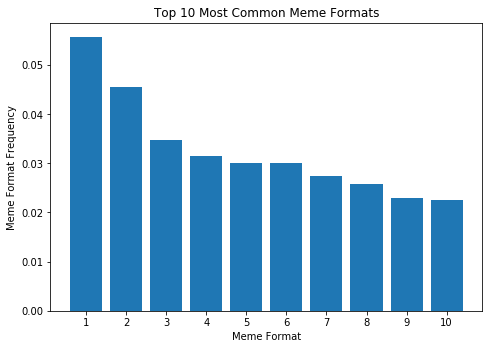

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [32141/575948, 26186/575948, 19971/575948, 18164/575948, 17325/575948, 17272/575948, 15850/575948, 14802/575948, 13194/575948, 12985/575948]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Top 10 Most Common Meme Formats')
plt.ylabel("Meme Format Frequency")
plt.xlabel("Meme Format")
plt.show()
#  "total": 575948,

In [13]:
# making word embeddings for RNN
UNK = "<unk>"
WORDEMBSIZE = 64
W2V_WINDOW = 7
W2V_COUNT = 1
W2V_EPOCH=100

def makeVocab(text):
    vocab = set()
    for sentences in text:
        for word in sentences:
            vocab.add(word)
    return vocab

def makeEmbModel(data):
    docs = [[UNK]]
    docs.extend(data)
    model = Word2Vec(window=W2V_WINDOW, min_count=W2V_COUNT, size=WORDEMBSIZE)
    model.build_vocab(docs)
    model.train(docs, total_examples=len(docs), epochs=W2V_EPOCH)
    print(model)
    return model

def makeEmbeddings(data, model, vocab):
    vecData = []
    for sentence in data:
        wordEmbs = []
        for word in sentence:
            if word in vocab:
#                 print(type(model[word]))
#                 print(model[word])
                wordEmbs.append(model[word])
            else:
                wordEmbs.append(np.zeros(WORDEMBSIZE))
        wordEmbs = torch.FloatTensor(wordEmbs)
        vecData.append(wordEmbs)
    return vecData

In [35]:
# continue making word embeddings
X_words_train, X_words_test, y_train, y_test = train_test_split(X_words, y, test_size=0.2, random_state=42)
vocab = makeVocab(X_words_train)
emb_model = makeEmbModel(X_words_train)
vocab = set(list(emb_model.wv.vocab.keys()))
X_train = makeEmbeddings(X_words_train, emb_model, vocab)
X_test = makeEmbeddings(X_words_test, emb_model, vocab)

print(X_words_train[0])
print(X_train[0])
print(y_train[0])

Word2Vec(vocab=17434, size=64, alpha=0.025)


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


['belt', 'ww3', 'me']
tensor([[ 0.6852,  0.6181, -0.2568,  0.3250, -1.3172,  0.2496,  1.3115, -0.6972,
         -0.4141,  0.5243, -1.7616,  0.2553, -0.6701,  1.6186,  0.3276,  0.8346,
         -0.9366, -1.9377,  2.3634, -0.3053, -0.5340,  0.5596, -0.2272, -2.2908,
         -0.4170, -2.3659,  1.3769,  1.5357,  0.0102,  0.9227, -0.6851,  0.5771,
          2.0212,  0.8715,  0.4708, -0.4264,  3.3132,  0.4821, -0.6754, -1.1405,
          0.4538,  0.7242, -0.1118, -1.6256, -0.1296, -0.7650, -0.0934, -1.6463,
         -1.5256, -0.5843,  0.8034, -0.2167,  0.0690,  0.4020,  0.6104, -0.5651,
          0.3560, -0.5685,  0.4722, -1.9669,  1.1146, -1.0029, -1.3665,  1.2768],
        [-0.4765,  0.5289,  1.1611, -0.8996,  1.0058,  0.0714,  0.8915,  0.4927,
          0.8312,  0.5370, -0.6288,  0.9239, -0.9126,  0.2235, -0.4757,  0.7656,
          0.2865, -1.8399,  1.2815,  0.3319, -0.1546, -1.0035,  0.0527,  0.0968,
         -0.2781, -0.6563, -0.1969,  0.5809, -0.7759,  1.6513, -1.8309,  0.1211,
     

In [36]:
# RNN building to predict result
import torch
import torch.nn as nn
import torch.optim as optim
import random
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [37]:
# RNN model
class RNN(nn.Module):
    def __init__(self, input_dim, h, output_dim = 5):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_dim, h, dropout=0.2)
        self.finalLayer = nn.Linear(h, output_dim)
        self.input_dim = input_dim
        self.hidden_dim = h
        self.output_dim =  output_dim
#         self.word_embeddings = nn.Embedding(vocab_size, input_dim)
        self.softmax = nn.LogSoftmax()
        self.loss = nn.NLLLoss()
    
    def compute_loss(self, predicted_vector, gold_label):
        return self.loss(predicted_vector, gold_label)
    
    def forward(self, inputs):
        out, hidden = self.rnn(inputs)
        hidden = hidden.contiguous().view(-1,self.hidden_dim)
        predicted_vector = self.softmax(self.finalLayer(hidden))
        return predicted_vector

In [38]:
# running epochs for training and validation
HIDDEN_DIM = 128
EPOCHS = 30

model = RNN(WORDEMBSIZE, HIDDEN_DIM, 5)
optimizer = optim.SGD(model.parameters(),lr=0.0005, momentum=0.9)
train_loss = []
test_loss = []
for epoch in range(EPOCHS):
    print("\n\n-------------")
    print("EPOCH: {}".format(epoch + 1))
    running_loss = 0.0
    model.train()
    optimizer.zero_grad()
    print("Training started for epoch:{}".format(epoch + 1))
    X_train, y_train = shuffle(X_train, y_train)
    start_time = time.time()
    correct = total = 0
    minibatch_size = 16
    N = len(y_train)
    for minibatch_idx in tqdm(range(N // minibatch_size)):
        optimizer.zero_grad()
        loss = None
        for idx in range(minibatch_size):
            text = X_train[minibatch_idx * minibatch_size + idx]
            text = torch.unsqueeze(text, 1)
            labelIdx = y_train[minibatch_idx * minibatch_size + idx]
            log_probs = model(text)
            text_loss = model.compute_loss(log_probs.view(1,-1), torch.tensor([labelIdx]))
            running_loss += text_loss
            if loss is None:
                loss = text_loss
            else:
                loss += text_loss
            pred_label = torch.argmax(log_probs)
            correct += int(pred_label == labelIdx)
            total += 1
        loss = loss / minibatch_size
        loss.backward()
        optimizer.step()
    train_loss.append(running_loss / N)
    print("Training completed for epoch: {}".format(epoch + 1))
    print("Time for train: {}".format(time.time() - start_time))
    print("Accuracy: {}".format(correct / total))
    
    #validation
    running_loss = 0.0
    model.eval()
    optimizer.zero_grad()
    print("Validation started for epoch:{}".format(epoch + 1))
    X_test, y_test = shuffle(X_test, y_test)
    start_time = time.time()
    correct = total = 0
    minibatch_size = 16
    N = len(y_test)
    for minibatch_idx in tqdm(range(N // minibatch_size)):
        optimizer.zero_grad()
        for idx in range(minibatch_size):
            text = X_test[minibatch_idx * minibatch_size + idx]
            text = torch.unsqueeze(text, 1)
            labelIdx = y_test[minibatch_idx * minibatch_size + idx]
            log_probs = model(text)
            text_loss = model.compute_loss(log_probs.view(1,-1), torch.tensor([labelIdx]))
            running_loss += text_loss
            pred_label = torch.argmax(log_probs)
            correct += int(pred_label == labelIdx)
            total += 1
    test_loss.append(running_loss / N)
    print("Validation completed for epoch: {}".format(epoch + 1))
    print("Time for validation: {}".format(time.time() - start_time))
    print("Accuracy: {}".format(correct / total))

plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()



-------------
EPOCH: 1


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Training started for epoch:1


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


RuntimeError: input must have 3 dimensions, got 2

In [ ]:
selected_memes = [
    'Woman-Yelling-At-Cat.json',  #4604
    'Left-Exit-12-Off-Ramp.json', #4319
    'Surprised-Pikachu.json',    #3507
    'Is-This-A-Pigeon.json',   #3507
    'Drake-Hotline-Bling.json',  #2690
    'Blank-Nut-Button.json', #5714
    'One-Does-Not-Simply.json',# 26186 #only use 5000 to match button meme number
    'Change-My-Mind.json', #8563
    'Roll-Safe-Think-About-It.json', #6948
    'Leonardo-Dicaprio-Cheers.json' #8377
]